# 02. Data Analysis and Our First Model (Titanic)

This notebook will walk through a full, end-to-end data science project. We will:
1.  **Load** the Titanic dataset.
2.  **Explore** the data (Exploratory Data Analysis - EDA).
3.  **Clean** and prepare the data (Preprocessing).
4.  **Train** our first Machine Learning model.
5.  **Evaluate** how well our model performs.

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# A 'magic' command to make plots appear directly in the notebook
%matplotlib inline

## 1. Load and Inspect the Data

First, we load our dataset from the `data/` folder into a Pandas DataFrame.

In [3]:
# Load the dataset
df = pd.read_csv('data/train.csv')

Now, let's perform our standard 3-step inspection:
1.  `.head()` - To see the first few rows and column names.
2.  `.info()` - To check data types and (most importantly) **missing values**.
3.  `.describe()` - To get a statistical summary of the *numerical* columns.

In [4]:
# 1. Look at the first 5 rows
print("--- .head() ---")
display(df.head())

# 2. Get the technical summary
print("\n--- .info() ---")
df.info()

# 3. Get the statistical summary
print("\n--- .describe() ---")
display(df.describe())

--- .head() ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



--- .info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- .describe() ---


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Exploratory Data Analysis (EDA)

Now that we have a first look at the data, we'll dig deeper. The goal of EDA is to understand our data's patterns, relationships, and anomalies (like missing data) before we try to model it.

We will focus on our **target variable**: `Survived`. (0 = No, 1 = Yes).

### Visualizing Missing Data
A heatmap is a great way to see "where" the missing data is.

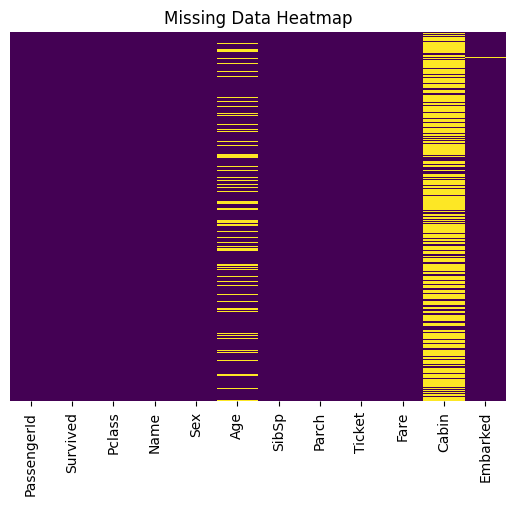

In [5]:
# Let's visualize the missing data (NaN values) with a heatmap
# 'isnull()' returns True for missing values, False otherwise
# A 'True' value shows up as a light dash in this plot
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

plt.title('Missing Data Heatmap')
plt.show()

### Who Survived?

Let's start by looking at our target variable, `Survived`.

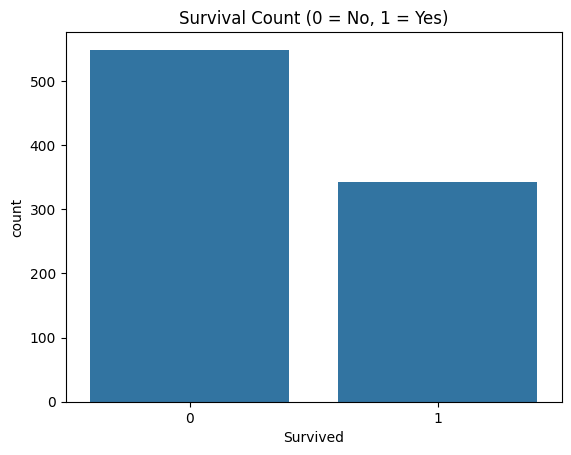

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [6]:
# Let's see the count of survivors vs. non-survivors
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

# Print the exact numbers
print(df['Survived'].value_counts(normalize=True))

### Survival by Sex

Now let's see how survival was related to other factors. The "women and children first" rule is famous. Was it followed?

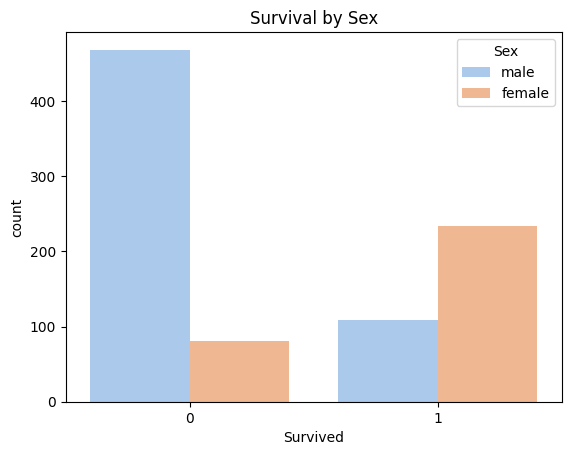

In [7]:
# Survival count broken down by Sex
sns.countplot(x='Survived', hue='Sex', data=df, palette='pastel')
plt.title('Survival by Sex')
plt.show()

### Survival by Passenger Class (Pclass)

Did money make a difference? Let's check the passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).

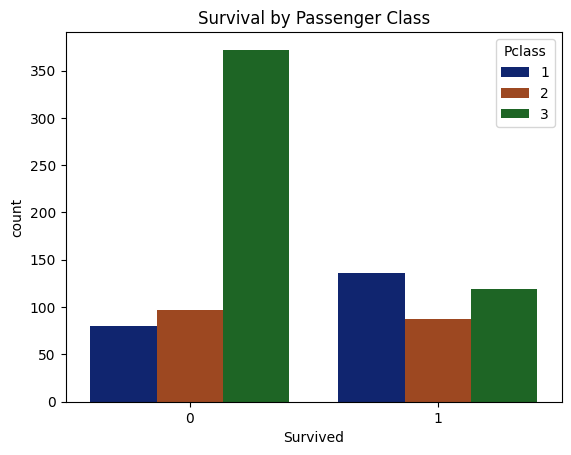

In [8]:
# Survival count broken down by Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=df, palette='dark')
plt.title('Survival by Passenger Class')
plt.show()

### Survival by Age

Let's look at the age distribution of passengers and how it relates to survival.

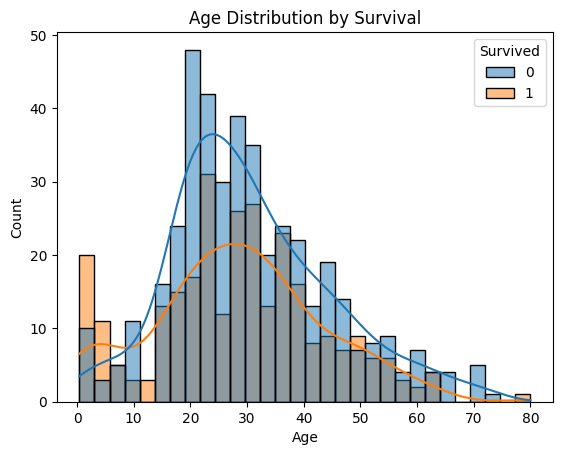

In [9]:
# Distribution of Age, split by survival
# 'kde=True' shows a smooth line over the bars (Kernel Density Estimate)
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.show()

## 3. Data Cleaning and Preprocessing

Our data is "dirty." We have missing values (`NaN`) and non-numerical text columns (like `Sex` or `Embarked`). A machine learning model can't handle either.

Our goal is to create a perfectly clean, 100% numerical dataset.

### Step 3.1: Imputing Missing 'Age'

'Age' is an important predictor (as we saw), so we can't drop it. We need to "impute" (fill in) the missing values.

A common strategy is to fill the missing ages with the *average* age. A *better* strategy is to fill them with the average age *by passenger class*. 1st class passengers were generally older than 3rd class passengers.

We'll use the **median** instead of the mean, because it's less sensitive to outliers (like a few 80-year-old passengers).

In [10]:
# Let's see the median age for each class
print("Median age by Pclass:")
print(df.groupby('Pclass')['Age'].median())

# Now, we'll write a function to apply this
# 'transform' is a powerful Pandas tool. It will fill all 'NaN' in 'Age'
# with the median age corresponding to that row's 'Pclass'.
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

print("\nMissing 'Age' values have been filled.")

Median age by Pclass:
Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Missing 'Age' values have been filled.


### Step 3.2: Imputing Missing 'Embarked'

We only have 2 missing values for 'Embarked'. We can simply fill these with the **mode** (the most common value).

In [11]:
# Find the most common embarkation port
print(f"Most common port (mode): {df['Embarked'].mode()[0]}")

# Fill the 2 NaN values with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("Missing 'Embarked' values have been filled.")

Most common port (mode): S
Missing 'Embarked' values have been filled.


### Step 3.3: Dropping the 'Cabin' Column

The 'Cabin' column is missing over 77% of its data. It's not recoverable. We will **drop** this column entirely.

In [12]:
# Drop the 'Cabin' column
# 'axis=1' means we are dropping a COLUMN, not a row
df = df.drop('Cabin', axis=1)

print("'Cabin' column has been dropped.")

'Cabin' column has been dropped.


### Step 3.4: Verify Our Cleaning

Let's run `.info()` again to confirm our missing data problems are solved.

In [13]:
# Check for any remaining missing values
print("--- .info() after cleaning ---")
df.info()

--- .info() after cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Step 3.5: Converting Categorical Features to Numbers

Our model needs everything to be a number. We have two main text columns left: `Sex` and `Embarked`. We also have `Name` and `Ticket` which are too complex to use for now.

* **Sex:** We can easily convert 'male'/'female' to 0/1.
* **Embarked:** We'll use a technique called **One-Hot Encoding**. This creates a new column for *each* port (e.g., 'Embarked_S', 'Embarked_C') and puts a 1 or 0 in it. This is the standard way to handle categorical variables that don't have a natural order.
* **Irrelevant Columns:** We'll drop `Name`, `Ticket`, and `PassengerId` as they are unique identifiers or too complex for this first model.

In [14]:
# Convert 'Sex' to 0/1 using pd.get_dummies
# drop_first=True is a good practice to avoid redundancy (if not male, must be female)
sex_dummies = pd.get_dummies(df['Sex'], drop_first=True, dtype=int)

# Convert 'Embarked' using one-hot encoding
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True, dtype=int)

# Add these new columns to our DataFrame
df = pd.concat([df, sex_dummies, embarked_dummies], axis=1)

# Drop the original text columns and the irrelevant ones
df = df.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1)

print("Text columns converted and irrelevant columns dropped.")

Text columns converted and irrelevant columns dropped.


## 4. The Final Clean Dataset

Let's look at `.head()` one last time. Our DataFrame is now a fully numerical matrix, ready for our Machine Learning model!

In [15]:
# Display the head of our final, clean, numerical DataFrame
display(df.head())

# Check the .info() again to see all data types are numerical
df.info()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   male        891 non-null    int64  
 7   Embarked_Q  891 non-null    int64  
 8   Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


# 5. Building Our Machine Learning Model

We have a clean, numerical dataset. Now we can train a model. We will use the **scikit-learn** library, the standard for ML in Python.

## 5.1. Separate Features (X) and Target (y)

Our model needs to know what it's learning *from* (the features) and what it's trying to *predict* (the target).

* **X (Features):** All the columns *except* `Survived`. These are the "clues."
* **y (Target):** The `Survived` column. This is the "answer" we want to predict.

In [16]:
# 'X' contains all columns EXCEPT 'Survived'
X = df.drop('Survived', axis=1)

# 'y' contains ONLY the 'Survived' column
y = df['Survived']

## 5.2. Train-Test Split

This is the most critical concept in ML. We must evaluate our model on **unseen data** (data it did not use for training).

We will split our dataset:
* **Training Set (70%):** The model "studies" this data to find patterns.
* **Testing Set (30%):** We "test" the trained model on this data to see how well it learned.

We use a function from scikit-learn called `train_test_split` to do this.

In [17]:
# Import the function
from sklearn.model_selection import train_test_split

# Split the data
# test_size=0.3 means 30% of data goes to the test set
# random_state=42 ensures we get the same "random" split every time we run this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training data shape (X_train): {X_train.shape}")
print(f"Testing data shape (X_test): {X_test.shape}")

Training data shape (X_train): (623, 8)
Testing data shape (X_test): (268, 8)


## 5.3. Train the Model

We will use a **Logistic Regression** model. Despite its name, it's a model used for **classification** (not regression). It's a fantastic, robust, and interpretable first model.

The process is:
1.  **Import** the model.
2.  **Create** an instance of the model.
3.  **Train** the model using the `.fit()` method on the *training data*.

In [18]:
# 1. Import the model
from sklearn.linear_model import LogisticRegression

# 2. Create the model instance
log_model = LogisticRegression(max_iter=1000) # max_iter helps the model converge

# 3. Train the model on the training data
log_model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


## 5.4. Evaluate the Model

Our model is trained. Now we'll use it to make predictions on the **Test Set** (`X_test`), which it has never seen before. We can then compare these predictions to the *actual* answers (`y_test`) to see how accurate we are.

In [19]:
# 1. Make predictions on the test data
predictions = log_model.predict(X_test)

### Evaluation Metrics

We'll look at two key reports:

1.  **Classification Report:** This gives us the "holy trinity" of metrics:
    * **Precision:** Of all the times the model predicted "Survived", how many were correct?
    * **Recall:** Of all the people who *actually* survived, how many did the model find?
    * **F1-Score:** The balanced average of Precision and Recall.
2.  **Accuracy Score:** The simplest metric: (Correct Predictions / Total Predictions).

In [20]:
# Import the evaluation metrics
from sklearn.metrics import classification_report, accuracy_score

# 1. Print the Classification Report
print("--- Classification Report ---")
print(classification_report(y_test, predictions))

# 2. Print the overall Accuracy
print("\n--- Accuracy Score ---")
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268


--- Accuracy Score ---
Model Accuracy: 81.34%


# 6. Trying a More Powerful Model: Random Forest

Our Logistic Regression gave us a good baseline (81.34%). Now let's see if a more complex model can do better.

A **Random Forest** is an "ensemble" model. It works by building hundreds of individual "decision trees" (like simple flowcharts) and then taking a majority vote on the prediction. It's one of the most popular and effective "out-of-the-box" classifiers.

The best part? Our `X_train`, `X_test`, `y_train`, and `y_test` are already prepared! We just need to import the new model and repeat the `fit`/`predict`/`evaluate` steps.

In [21]:
# 1. Import the model
from sklearn.ensemble import RandomForestClassifier

# 2. Create the model instance
# n_estimators=100 means it will build 100 "trees"
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. Train the model on the same training data
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [22]:
# 1. Make predictions on the same test data
rf_predictions = rf_model.predict(X_test)

# 2. Print the Classification Report
print("--- Random Forest Classification Report ---")
print(classification_report(y_test, rf_predictions))

# 3. Print the overall Accuracy
print("\n--- Random Forest Accuracy Score ---")
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       157
           1       0.74      0.70      0.72       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.77      0.78      0.78       268


--- Random Forest Accuracy Score ---
Random Forest Accuracy: 77.61%


## 6.1. Feature Importance

So, our Random Forest model performed worse (likely due to **overfitting** on our small dataset), but it has a very useful feature: it can tell us which "clues" (features) it considered most important when making its decisions.

Let's visualize this.

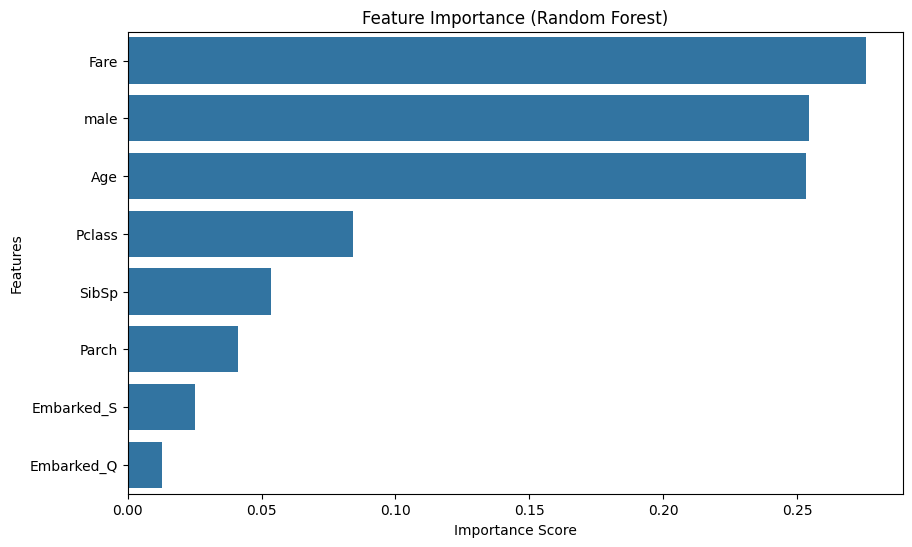

In [23]:
# Create a pandas Series to hold the feature importances
# This pairs the importance score with the column name
feature_imp = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10, 6)) # Make the plot a bit bigger
sns.barplot(x=feature_imp.values, y=feature_imp.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# 7. Final Conclusions & Key Takeaways

We have successfully completed our first end-to-end Machine Learning project. Here's what we learned:

### 1. The Workflow is Everything
We have a clear, repeatable process:
1.  **Load** (`pd.read_csv`)
2.  **Explore (EDA)** (`.info()`, `.describe()`, `seaborn` plots)
3.  **Clean & Prepare** (Imputing `NaN`s, `pd.get_dummies`)
4.  **Model** (`train_test_split`, `model.fit`)
5.  **Evaluate** (`classification_report`, `accuracy_score`)

This 5-step workflow is the foundation for almost *every* Data Science project.

### 2. EDA and Modeling are Linked
Our exploration (EDA) was not just for pretty charts. It's what guided our modeling:
* **EDA showed:** `Sex`, `Pclass`, and `Age` seemed important.
* **Feature Importance confirmed:** The Random Forest model relied most heavily on `fare`, `male`, `Pclass`, and `Age`.
* This shows a clear link: **Data exploration informs data cleaning and confirms model results.**

### 3. THE BIG LESSON: Simplicity Can Win
This is our most important theoretical takeaway.

* **Model 1 (Simple):** Logistic Regression -> **81.34% Accuracy**
* **Model 2 (Complex):** Random Forest -> **77.61% Accuracy**

A more complex, "powerful" model performed *worse*. Why?

This is a classic example of **Overfitting**.
* Our dataset is **small** (only ~600 rows for training).
* The **Random Forest** is so powerful that it likely began to **"memorize"** the noise and specific details of the training data.
* The **Logistic Regression** is too simple to "memorize". It was *forced* to find the broad, general patterns (the "signal").
* When we tested on unseen data, the "general patterns" (LR) were more useful than the "memorized details" (RF).

This demonstrates the core **Bias-Variance Tradeoff**: a simple model (like LR) is high-bias but low-variance. A complex model (like RF) is low-bias but (on small data) can be very high-variance.

**This is not a failure!** It's a successful demonstration of a critical data science concept.